### Import

In [16]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest, f_classif


### Load data

In [17]:
def load_data():
    # this_directory = os.path.dirname(os.path.abspath(__file__))
    data = pd.read_csv(os.path.join('hn', 'HN_radiomicFeatures.csv'), index_col=0)

    return data

data = load_data()
label = data["label"]
data = data.drop(["label"], axis=1)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


The number of samples: 113
The number of columns: 159


### Check for missing data

In [18]:
# Detect missing values in dataframe
data.isnull().values.any()

False

### Exclude features with zero variance

In [19]:
# exclude features with zero variances
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(data)
selector.fit_transform(data).shape

(113, 157)

### Data split

In [20]:
train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
# train_data, val_data, train_label, val_label = train_test_split(train_val_data, train_val_label, train_size=0.85)

print(f'The number of train samples: {train_data.shape[0]}')
# print(f'The number of validation samples: {val_data.shape[0]}')
print(f'The number of test samples: {test_data.shape[0]}')

The number of train samples: 90
The number of test samples: 23


### Scaling train data

In [21]:
scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

### Scaler & Linear Classifier

In [22]:
clf = SGDClassifier()
clf.fit(train_data, train_label)
print(np.shape(clf.coef_))
print(clf.intercept_)

label_train_pred = clf.predict(train_data)
print(metrics.accuracy_score(train_label, label_train_pred))

y_pred = clf.predict(test_data)
print(metrics.accuracy_score(test_label, y_pred))

(1, 159)
[-66.4297316]
1.0
0.6086956521739131


### kNN classifier

In [23]:
# Perform a PCA
pca = decomposition.PCA(n_components=10)
pca.fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)
print(sum(pca.explained_variance_ratio_))

# Fit kNN
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(train_pca, train_label)
score_train = knn.score(train_pca, train_label)
score_test = knn.score(test_pca, test_label)

# Print result
print(f"Training result: {score_train}")
print(f"Test result: {score_test}")

0.7171071507587621
Training result: 0.8222222222222222
Test result: 0.4782608695652174


### Find average accuracy over multiple classifications

In [24]:
# Find mean accuracy for 10 kNN classifications
loops = 100
score_train = np.zeros(loops)
score_test = np.zeros(loops)

for i in range(loops):
    train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
    scaler = StandardScaler().fit(train_data)
    train_data = scaler.transform(train_data)
    test_data = scaler.transform(test_data)

    # Perform a PCA
    pca = decomposition.PCA(n_components=10)
    pca.fit(train_data)
    train_pca = pca.transform(train_data)
    test_pca = pca.transform(test_data)

    # Fit kNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=10)
    knn.fit(train_pca, train_label)
    score_train[i] = knn.score(train_pca, train_label)
    score_test[i] = knn.score(test_pca, test_label)

mean_score_train = np.mean(score_train)
mean_score_test = np.mean(score_test)
print(score_train)
print(score_test)
print(f"Mean training score: {mean_score_train}")
print(f"Mean test score: {mean_score_test}")

[0.76666667 0.73333333 0.8        0.76666667 0.74444444 0.72222222
 0.74444444 0.77777778 0.74444444 0.73333333 0.77777778 0.75555556
 0.81111111 0.8        0.74444444 0.77777778 0.73333333 0.78888889
 0.8        0.76666667 0.78888889 0.78888889 0.74444444 0.72222222
 0.8        0.74444444 0.76666667 0.75555556 0.72222222 0.75555556
 0.83333333 0.78888889 0.76666667 0.8        0.75555556 0.73333333
 0.73333333 0.77777778 0.71111111 0.81111111 0.72222222 0.72222222
 0.75555556 0.75555556 0.74444444 0.71111111 0.74444444 0.76666667
 0.81111111 0.72222222 0.77777778 0.76666667 0.76666667 0.75555556
 0.68888889 0.81111111 0.73333333 0.73333333 0.78888889 0.77777778
 0.77777778 0.81111111 0.77777778 0.73333333 0.78888889 0.71111111
 0.76666667 0.75555556 0.78888889 0.84444444 0.75555556 0.78888889
 0.77777778 0.75555556 0.81111111 0.75555556 0.74444444 0.75555556
 0.8        0.76666667 0.71111111 0.76666667 0.72222222 0.78888889
 0.75555556 0.73333333 0.68888889 0.73333333 0.73333333 0.7333

Feature 0: 18.136475
Feature 1: 16.673369
Feature 2: 3.485805
Feature 3: 0.621536
Feature 4: 0.815389
Feature 5: 0.347602
Feature 6: 1.820459
Feature 7: 8.264447
Feature 8: 8.728642
Feature 9: 1.002005
Feature 10: 1.090230
Feature 11: 0.179379
Feature 12: 0.353097
Feature 13: 0.253742
Feature 14: 2.026762
Feature 15: 0.109696
Feature 16: 1.894476
Feature 17: 2.030408
Feature 18: 1.292731
Feature 19: 4.487484
Feature 20: 0.000000
Feature 21: 1.070495
Feature 22: 0.110494
Feature 23: 8.261127
Feature 24: 5.010041
Feature 25: 23.557577
Feature 26: 12.984504
Feature 27: 0.430705
Feature 28: 10.067362
Feature 29: 0.960667
Feature 30: 1.432707
Feature 31: 8.531858
Feature 32: 20.051388
Feature 33: 0.465680
Feature 34: 0.465680
Feature 35: 4.605659
Feature 36: 12.817023
Feature 37: 8.839457
Feature 38: 9.203250
Feature 39: 4.605659
Feature 40: 35.210898
Feature 41: 22.847146
Feature 42: 24.436797
Feature 43: 29.993983
Feature 44: 17.726596
Feature 45: 17.646331
Feature 46: 0.299506
Feature 47

C:\Users\vmart\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [145 146] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\vmart\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


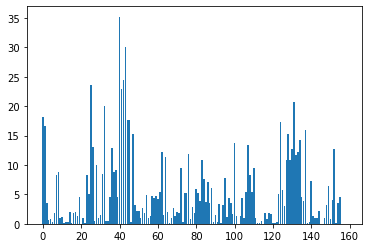

In [25]:
# You can understand the F-Scores as a measure of how informative each feature is for your dataset.
# As it is explained in the method documentation, an F-test is carried out to assess each feature. 
# The F-scores are the test statistic for the F-test, and they basically represent the ratio between the explained and the unexplained variance.

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(train_data, train_label)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()